As hinted at the end of our notebook on the Kaplan-Meier Estimator, we can enrich our approximations of Survival and Hazard curves by using covariate (attribute) data from our records. One of the most popular methods of doing so is by employing the Cox Proportional Hazard model.

Borrowing once more from the [`lifelines` documentation](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#model-selection-in-survival-regression), the Cox model estimates a given hazard function as

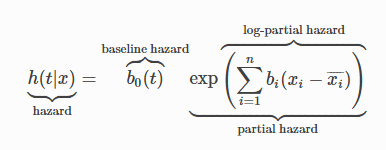

In [1]:
from IPython.display import Image
Image('images/lifelines_cox_eq.PNG')

Essentially, this model behaves in two parts:

* The baseline hazard function is some curve, shared by each record in our population
* The a linear combination of the covariates act on this baseline hazard function with a multiplicative effect

### Observations

#### The baseline hazard doesn't matter when looking at the hazard ratio

This should be pretty obvious. If we want to know the relative hazard for agents `a` and `b` in our sample, it's simply a matter of dividing the two.

$\frac{h(t_a)}{h(t_b)} = \frac{b_0 \exp ( \sum{w^T \beta_a}}{b_0 \exp ( \sum{w^T \beta_b})}$

And you can see that the `b_0` terms clearly cancel out.

#### The *proportional* of proportional hazard

Moreover, one of the key assumpts that the Cox model makes is that the proportional hazard between two records stays the same. That's to say that despite the fact that hazard changes over time, scaled by the covariates, the relative hazard when comparing various records should be the same.

I like how this is shown in the illustration from [this video](https://www.youtube.com/watch?v=z1b2hFzXsrU). Note that despite the fact that the dotted line is clearly steeper than the solid, you can see that at any given point, the height can be expressed as a `solid = .64 * dotted`, due to their hazard ratio.

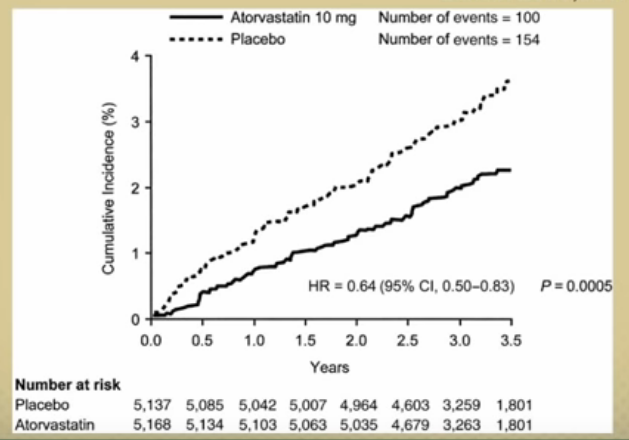

In [2]:
Image('images/prop_hazard.PNG')

#### The `log` of hazard ratio is linear

Where "hazard ratio" is between the left-most term and the baseline hazard. This can be made clear with some simple algebra

$h = b_0 \exp ( \sum{b_i (x - \bar{x}}))$

$\frac{h}{b_0} = \exp ( \sum{b_i (x - \bar{x}}))$

$ln(\frac{h}{b_0}) = \sum{b_i (x - \bar{x}})$

The reason we're interested in this is because-- like the log-odds ratio-- it allows us to interpret the effect of activated categorical variables or unit changes in continuous variables.

#### We can fit the weights without knowing the baseline hazard

Finally, it might feel a little black box-y when thinking about fitting the model. A lot of variables at play here, for sure.

Fortunately, it can be shown with a little more algebra that we can achieve our best approximation for the covariate weights by ignoring the baseline hazard completely. Borrowing this derivation from the second chapter of [Introduction to Algorithmic Marketing](https://smile.amazon.com/Introduction-Algorithmic-Marketing-Artificial-Intelligence/dp/0692989048?sa-no-redirect=1)

First, they start off by defining an equation that would represent the likelihood of the model.

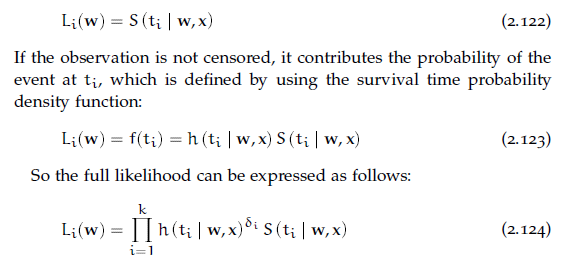

In [3]:
Image('images/cox_likelihood_1.PNG')

The first two equations deal with censored and uncensored data, respectively. When they're combined into the third equation, the `delta_i` term in the exponent acts as a `0/1` switch to control for this.

However, we're still stuck, waiting on the baseline hazard model. This is side-stepped by some clever application of partial likelihoods.

First, they define a "risk set" as the set of all individuals that have yet to experience the event. This is essentially the leftover population of the Survival Curve after any point `t`.

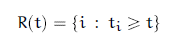

In [4]:
Image('images/cox_likelihood_2.PNG')

Then, they reiterate that the partial likelihood is: 

1. The conditional probability that person `i` will fail at time `t_i`
2. Given the set risk at that time
3. And that exactly one failure will happen at time `t_i`

Recall from our [Building Blocks](https://napsterinblue.github.io/notes/stats/survival_analysis/building_blocks/) notebook, that the Hazard Function is a point-in-time estimate of the risk. And so putting on our calculus hats, we'll multiply this function by a sliver of time `dt` to get an approximation fo the Probability of failure.

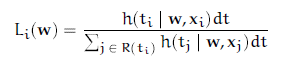

In [5]:
Image('images/cox_likelihood_3.PNG')

And because this probability is conditioned on having survived for this long, we divide by the sum of similar terms for everyone else who has survived this long, due to general conditional probability rules.

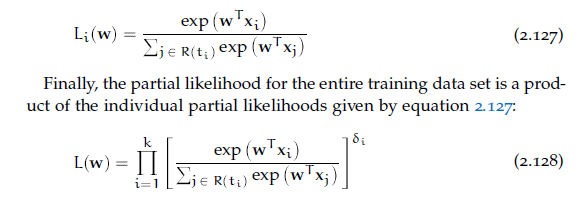

In [6]:
Image('images/cox_likelihood_4.PNG')

As we saw earlier in this notebook, dividing a hazard by a hazard cancels out the baseline hazard term, giving us an equation free from the tyranny of having to approximate two different features at once.

Finally, we use the Likelihood of one individual to reformulate the likelihood of the population, again leveraging the `delta_i` term to denote censorship.

We (or more appropriately, computers) can estimate the values of the weight-vector `w` using numerical methods (read: throw it into `lifelines`). And if all we want to do is compare individual hazards, we're golden.

But if we're interested in plotting estimates of individuals, the baseline hazard function is popularly attained through use of the Brewslow Estimator, which I'll leave as an exercise to the rader (read: the math is over my head and you get it for free in `lifelines`, lol)